In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets

# Check library versions
print("PyTorch Version:", torch.__version__)# Print PyTorch version
print("Torchvision Version:", torchvision.__version__)# Print torchvision version


PyTorch Version: 2.5.0+cpu
Torchvision Version: 0.20.0+cpu


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'#to run the code without any kernel issue

In [3]:
# Defining the transformation for the dataset
transform = transforms.Compose([
    transforms.ToTensor(), # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))# Normalize images to mean=0.5 and std=0.5
])

# Downloading and loading the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Checking the size of the datasets
print(f'Train dataset size: {len(train_dataset)}')  # Should be 60000
print(f'Test dataset size: {len(test_dataset)}')# Should be 10000


Train dataset size: 60000
Test dataset size: 10000


In [4]:
# Specifying the batch size
batch_size = 128   # Set batch size for data loading

# Creating DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # Shuffle training data
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)# No shuffle for test data

# Checking the number of batches in the training and test loaders
print(f'Number of batches in train loader: {len(train_loader)}') # Total batches in training
print(f'Number of batches in test loader: {len(test_loader)}')  # Total batches in testing


Number of batches in train loader: 469
Number of batches in test loader: 79


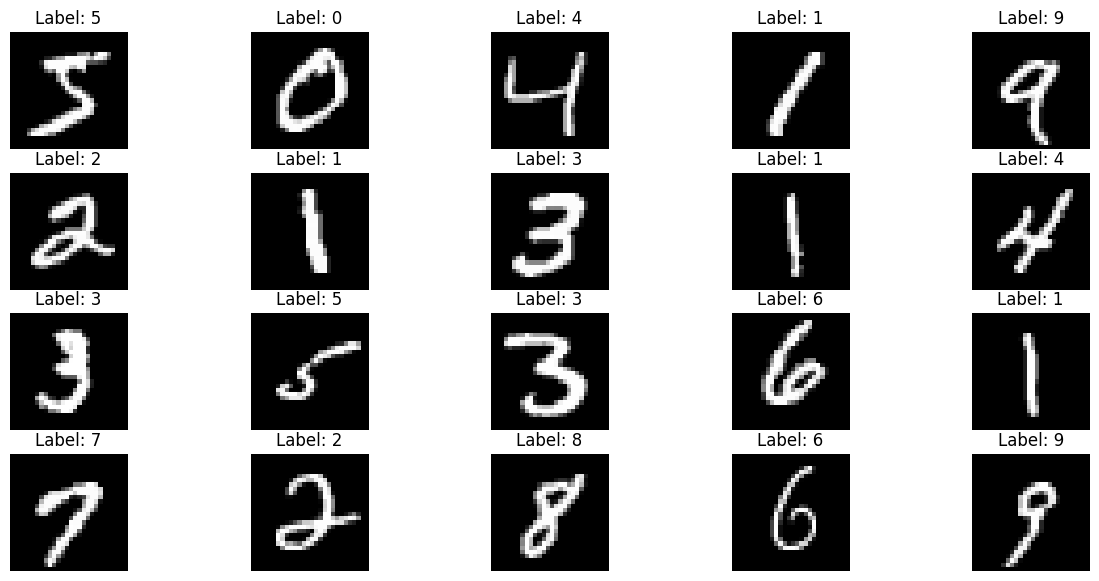

In [5]:
# Function to visualize samples from the dataset
def visualize_samples(dataset, num_samples=20):  # Function to show a specified number of samples
    plt.figure(figsize=(15, 7))  # Adjusted figure size for better visibility
    for i in range(num_samples):
        plt.subplot(4, 5, i + 1)  # Adjust the subplot grid to accommodate 20 images
        image, label = dataset[i] # Get the image and its label
        plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the channel dimension
        plt.title(f'Label: {label}') # Show the label above the image
        plt.axis('off')
    plt.show() # Show the plot

# Visualizing some samples
visualize_samples(train_dataset)


In [6]:
from torch.utils.data import DataLoader

# Creating DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Check the number of batches in the training and test loaders
print(f'Number of batches in train loader: {len(train_loader)}')
print(f'Number of batches in test loader: {len(test_loader)}')


Number of batches in train loader: 938
Number of batches in test loader: 157


In [7]:
# Step 5: Define a Multi-Layer Perceptron (MLP)
class MLP(nn.Module): # Create a new MLP class that inherits from nn.Module
    def __init__(self):# Initialize the class
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # First hidden layer
        self.fc2 = nn.Linear(256, 128)       # Second hidden layer
        self.fc3 = nn.Linear(128, 64)        # Third hidden layer
        self.fc4 = nn.Linear(64, 10)         # Output layer (10 classes)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # First activation
        x = torch.relu(self.fc2(x))  # Second activation
        x = torch.relu(self.fc3(x))  # Third activation
        x = self.fc4(x)  # Output layer
        return x

# Instantiate the model
model = MLP()
print(model)



MLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
# Define loss function and optimizer
import torch.optim as optim  # Import the optim module for optimizers

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 5

for epoch in range(num_epochs): # Loop through each epoch
    for images, labels in train_loader:# Loop through each batch of images and labels
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)# Get model outputs for the current batch
        loss = criterion(outputs, labels)# Calculate the loss
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    # Print the loss at the end of each epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/5], Loss: 0.7217
Epoch [2/5], Loss: 0.6240
Epoch [3/5], Loss: 0.2953
Epoch [4/5], Loss: 0.0802
Epoch [5/5], Loss: 0.1452


In [9]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
correct = 0 # Initialize correct predictions counter
total = 0 # Initialize total predictions counter

with torch.no_grad():  # No need to track gradients
    for images, labels in test_loader:
        outputs = model(images) # Get model outputs
        _, predicted = torch.max(outputs.data, 1) # Get the predicted class for each image
        total += labels.size(0) # Update total number of samples
        correct += (predicted == labels).sum().item() # Count correct predictions

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')


Accuracy of the model on the test dataset: 92.94%
